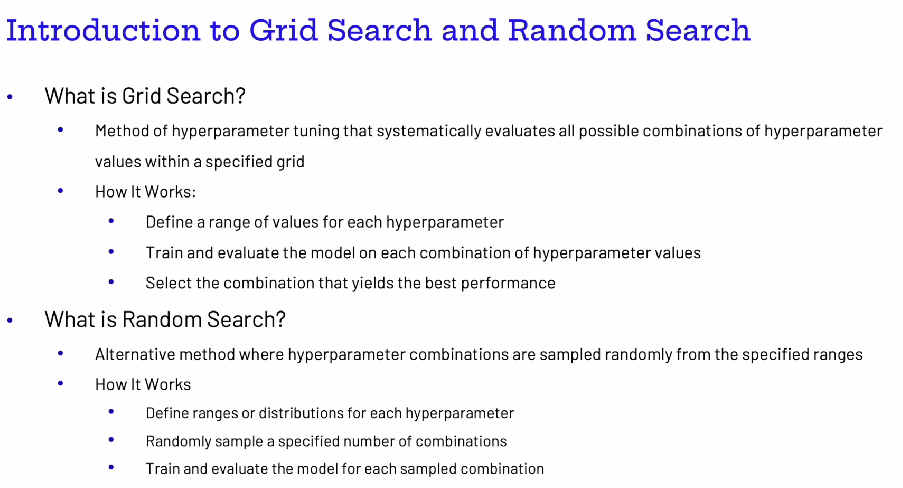
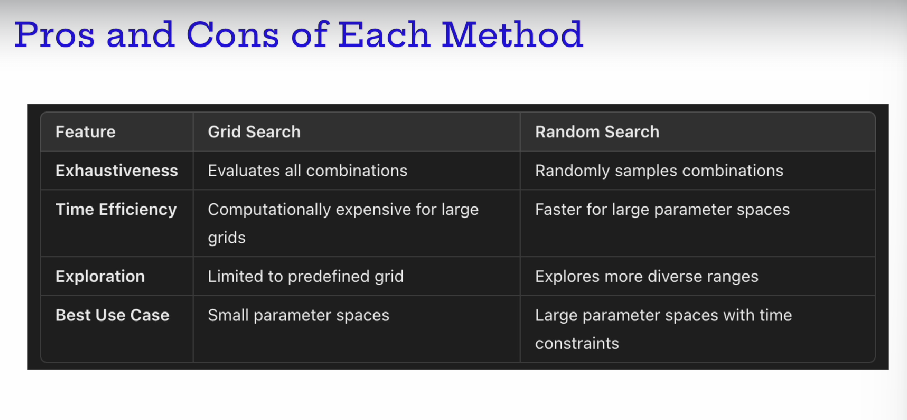
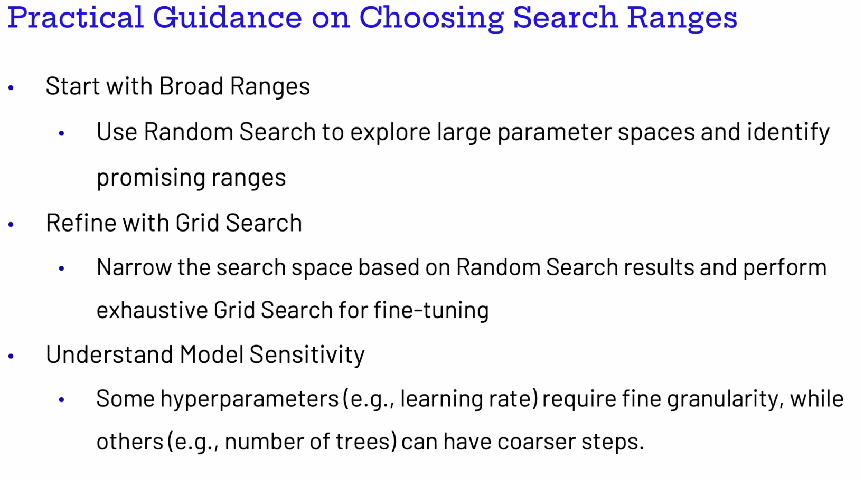

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = load_iris()
x, y = data.data , data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [3]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
# defining hyperparameter grid
param_grid ={
    'n_estimators':[50,100,200],
    'max_depth':[None, 5, 10],
    'min_samples_split':[2,5,10]
}

# initialize gid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,   # cv stands for cross-validation
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)


In [14]:
accuracy_score(y_test, y_pred)

1.0

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [16]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

In [21]:
import numpy as np
param_dist = {
    'n_estimators':np.arange(50,200,10),
    'max_depth':[None,5,10,15],
    'min_samples_split':[2,5,10,20]
}
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

In [22]:
random_search.fit(x_train,y_train)
best_model = random_search.best_estimator_

In [23]:
y_pred = best_model.predict(x_test)

In [24]:
random_search.best_params_

{'n_estimators': np.int64(140), 'min_samples_split': 5, 'max_depth': None}